# Heart Disease Prediction

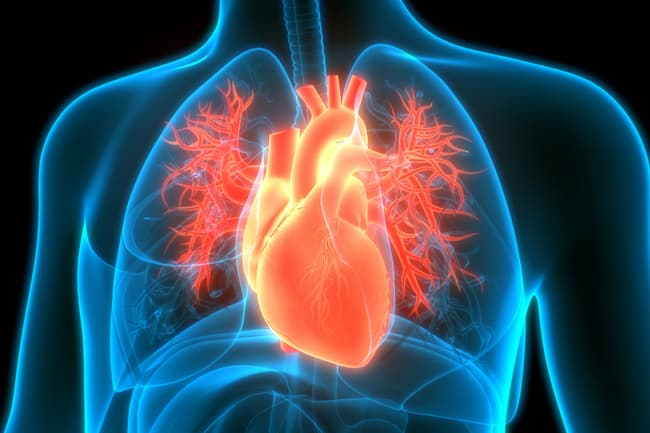

### Context:
#### - [Exploratory Data Analysis (EDA)](#EDA)
#### - [Data Pre-Processing](#PP)
#### - [Data Modeling](#modeling)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'Cairo'
plt.rcParams['font.serif'] = 'Cairo-Bold'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (12, 8)

<a id = "EDA"> </a>
## ● Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv("data/framingham.csv")
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
df.shape

(4240, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [7]:
df.duplicated().sum()
# No duplicates

0

In [8]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

findfont: Font family ['Cairo'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cairo'] not found. Falling back to DejaVu Sans.


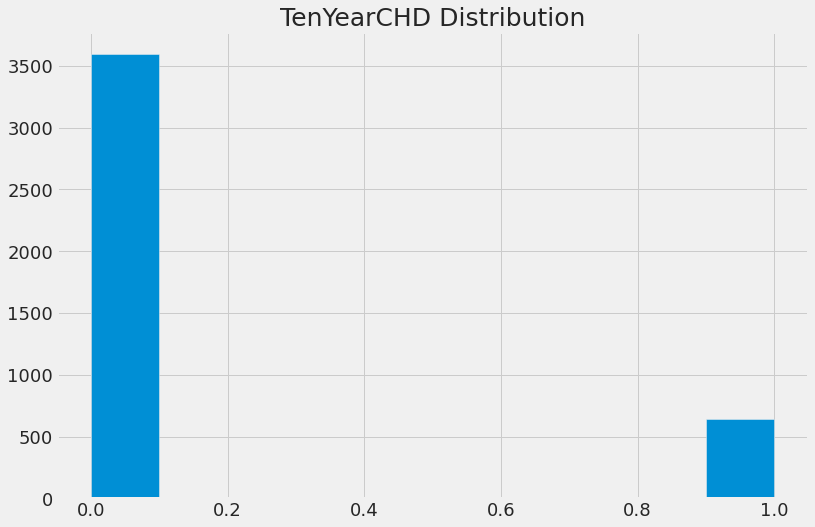

In [9]:
plt.hist(df['TenYearCHD']);
plt.title("TenYearCHD Distribution");

findfont: Font family ['Cairo'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cairo'] not found. Falling back to DejaVu Sans.


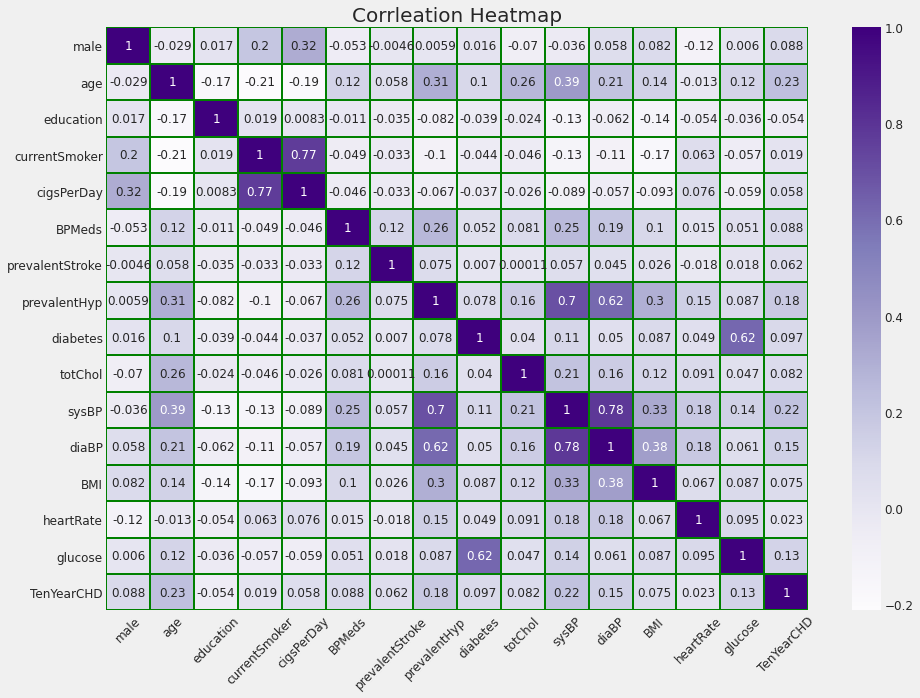

In [10]:
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.figure(figsize = (14, 10)) 
sns.heatmap(df.corr(), cmap='Purples',annot=True, linecolor='Green', linewidths=1.0)
plt.title("Corrleation Heatmap")
plt.xticks(rotation=45)
plt.show()

### Countplot of people based on their sex and whether they are Current Smoker or not

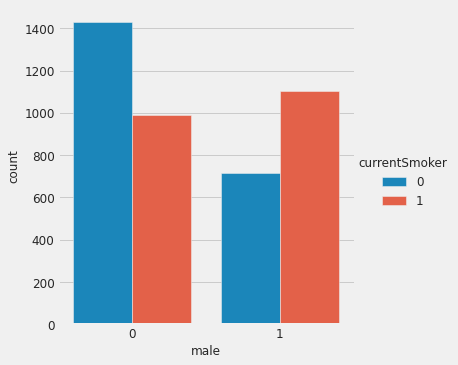

In [11]:
sns.catplot(data=df, kind='count', x='male',hue='currentSmoker')
plt.show()

<a id = "PP"> </a>
# ● Data Pre-Processing

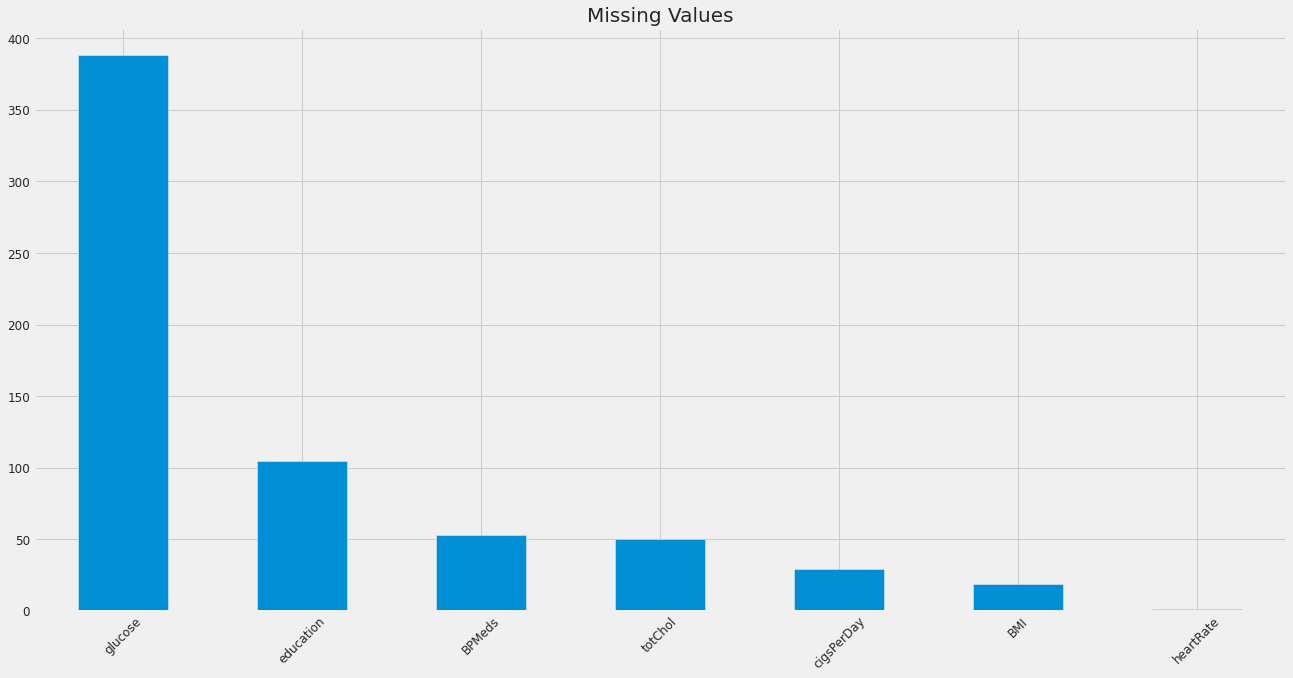

In [12]:
# plot missing values
def calc_missing(df):
    missing = df.isna().sum().sort_values(ascending=False)
    missing = missing[missing != 0]
    missing_perc = missing/df.shape[0]*100
    return missing, missing_perc

if df.isna().any().sum()>0:
    missing, missing_perc = calc_missing(df)
    missing.plot(kind='bar',figsize=(20,10))
    plt.title('Missing Values')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No Missing Values")

In [13]:
# Defining a function to remove nulls
def fixna(col,val):
        print(f"{df[col].value_counts()}")
        print(f"Old No of Nulls: {df[col].isna().sum()}")
        if val.lower() == "mode":
            df[col] = df[col].fillna(df[col].mode()[0])
        elif val.lower() == "mean":
            df[col] = df[col].fillna(df[col].mean())    
        else:
            df[col] = df[col].fillna(val)
        print(f"New No of Nulls: {df[col].isna().sum()}")

In [14]:
null_cols = [col for col in df.columns if df[col].isna().sum() !=0 ] # Cols with nulls
null_cols

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

In [15]:
for col in null_cols:
    print(df[col].value_counts(),end = "\n\n")

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
6.0       18
2.0       18
7.0       12
60.0      11
8.0       11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
16.0       3
12.0       3
13.0       3
45.0       3
19.0       2
14.0       2
70.0       1
38.0       1
29.0       1
Name: cigsPerDay, dtype: int64

0.0    4063
1.0     124
Name: BPMeds, dtype: int64

240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
432.0     1
385.0     1
363.0     1
362.0     1
347.0     1
Name: totChol, Length: 248, dtype: int64

22.19    18
22.54    18
22.91    18
23.48    18
25.09    16
         ..
35.78     1
19.37     1
31.29     1
34.91     1
39.60     1
Name: BMI, Length: 1364, dtype: int64

75.0     563
80.0     385
70.0     305
60.0     231
85.0     22

In [16]:
fixna('education','mode')

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64
Old No of Nulls: 105
New No of Nulls: 0


In [17]:
fixna('cigsPerDay','mean')

0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
6.0       18
2.0       18
7.0       12
60.0      11
8.0       11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
16.0       3
12.0       3
13.0       3
45.0       3
19.0       2
14.0       2
70.0       1
38.0       1
29.0       1
Name: cigsPerDay, dtype: int64
Old No of Nulls: 29
New No of Nulls: 0


In [18]:
fixna('BPMeds','mode') # mode not mean

0.0    4063
1.0     124
Name: BPMeds, dtype: int64
Old No of Nulls: 53
New No of Nulls: 0


In [19]:
fixna('totChol','mean')

240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
432.0     1
385.0     1
363.0     1
362.0     1
347.0     1
Name: totChol, Length: 248, dtype: int64
Old No of Nulls: 50
New No of Nulls: 0


In [20]:
fixna('BMI','mean')

22.19    18
22.54    18
22.91    18
23.48    18
25.09    16
         ..
35.78     1
19.37     1
31.29     1
34.91     1
39.60     1
Name: BMI, Length: 1364, dtype: int64
Old No of Nulls: 19
New No of Nulls: 0


In [21]:
fixna('heartRate','mean')

75.0     563
80.0     385
70.0     305
60.0     231
85.0     228
        ... 
47.0       1
44.0       1
101.0      1
143.0      1
46.0       1
Name: heartRate, Length: 73, dtype: int64
Old No of Nulls: 1
New No of Nulls: 0


In [22]:
fixna('glucose','mean')

75.0     193
77.0     167
73.0     156
80.0     153
70.0     152
        ... 
244.0      1
163.0      1
270.0      1
155.0      1
255.0      1
Name: glucose, Length: 143, dtype: int64
Old No of Nulls: 388
New No of Nulls: 0


In [23]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### <b> Nulls Fixed  😎

In [24]:
# Making a backup in case anything happened
backup = df

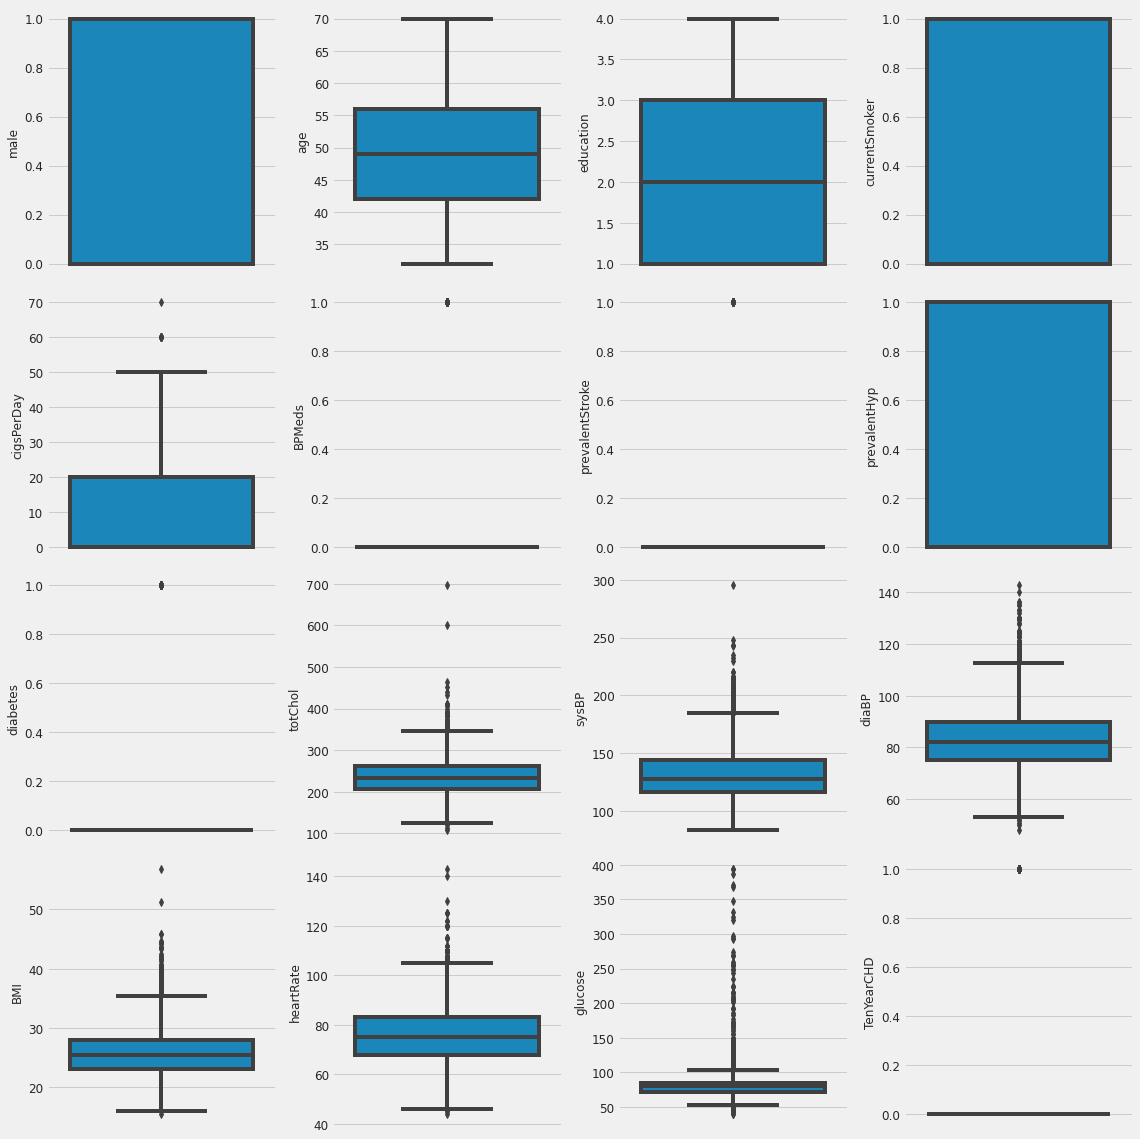

In [25]:
# boxplots of numerical features for outlier detection
fig = plt.figure(figsize=(16,16))
for i in range(len(df.columns)):
    fig.add_subplot(4, 4, i+1)
    sns.boxplot(y=df.iloc[:,i])
plt.tight_layout()
plt.show()

In [26]:
df[df['BMI'] >=50]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2657,0,55,1.0,0,0.0,0.0,0,1,0,208.0,190.0,130.0,56.80,90.0,86.0,1
3927,0,61,1.0,0,0.0,1.0,1,1,0,225.0,194.0,111.0,51.28,80.0,103.0,0


In [27]:
df.drop(df[df['BMI'] >=50].index,inplace = True)
df[df['BMI'] >=50]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


#### Glucose Level can be up to 400, and that indicates high sugar level in blood
#### Max of BMI is 50, it cannot be more than 50
#### Heart Rate can increase to 160 and sometimes more, so outliers here are normal
#### cholLevel can increase to 800 and sometimes 1000, normal
#### diaBP is not considered outlier

<a id = "modeling"> </a>
# ● Data Modelling

## Data Modelling - 1

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
num_feats = ['age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [30]:
df = df.sample(frac = 1) # Shuffling the records

In [31]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [32]:
x_train , x_test, y_train, y_test = TTS(x,y, test_size = 1/4, random_state = 42)

In [33]:
print(x_train.shape)
print(x_test.shape)

(3178, 15)
(1060, 15)


In [34]:
scaler = StandardScaler()

In [35]:
x_train[num_feats] = scaler.fit_transform(x_train[num_feats])
x_test[num_feats] = scaler.fit_transform(x_test[num_feats])

## Logistic Regression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred = model.predict(x_test)
score_train = model.score(x_train, y_train)
score_test = accuracy_score(y_test, y_pred)
print(f"Training score is: {round(score_train*100,2)}%",) 
print(f"Testing Accuracy is: {round(score_test*100,2)}%") 

Training score is: 85.59%
Testing Accuracy is: 85.19%


#### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
cm = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[892   7]
 [150  11]]


#### Classification Report

In [40]:
print("Classification Report:\n\n",classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.99      0.92       899
           1       0.61      0.07      0.12       161

    accuracy                           0.85      1060
   macro avg       0.73      0.53      0.52      1060
weighted avg       0.82      0.85      0.80      1060



#### Plotting the confusion matrix

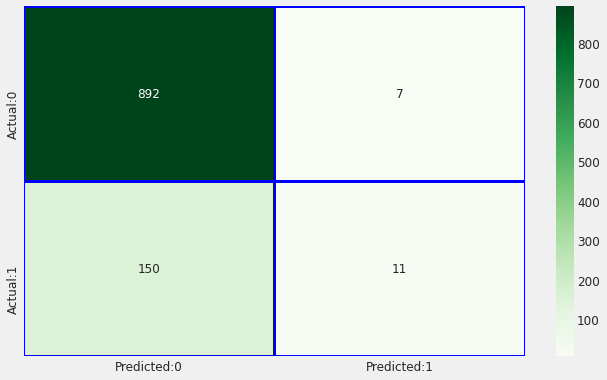

In [41]:
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

## Decision Tree

In [42]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred = model.predict(x_test)
score_train = model.score(x_train, y_train)
score_test = accuracy_score(y_test, y_pred)
print(f"Training score is: {round(score_train*100,2)}%",) 
print(f"Testing Accuracy is: {round(score_test*100,2)}%") ### Confusion Matrix

Training score is: 100.0%
Testing Accuracy is: 75.94%


#### Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
cm = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[755 144]
 [111  50]]


#### Classification Report

In [45]:
print("Classification Report:\n\n",classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.84      0.86       899
           1       0.26      0.31      0.28       161

    accuracy                           0.76      1060
   macro avg       0.56      0.58      0.57      1060
weighted avg       0.78      0.76      0.77      1060



#### Plotting the confusion matrix

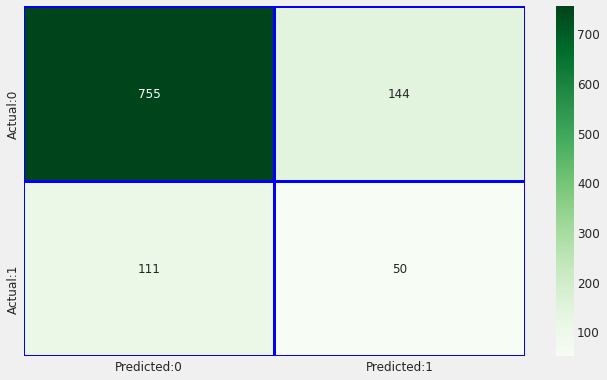

In [46]:
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

## Random Forest

In [47]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
y_pred = model.predict(x_test)
score_train = model.score(x_train, y_train)
score_test = accuracy_score(y_test, y_pred)
print(f"Training score is: {round(score_train*100,2)}%",) 
print(f"Testing Accuracy is: {round(score_test*100,2)}%") 

Training score is: 100.0%
Testing Accuracy is: 85.57%


#### Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
cm = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[892   7]
 [146  15]]


#### Classification Report

In [50]:
print("Classification Report:\n\n",classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.99      0.92       899
           1       0.68      0.09      0.16       161

    accuracy                           0.86      1060
   macro avg       0.77      0.54      0.54      1060
weighted avg       0.83      0.86      0.81      1060



#### Plotting the confusion matrix

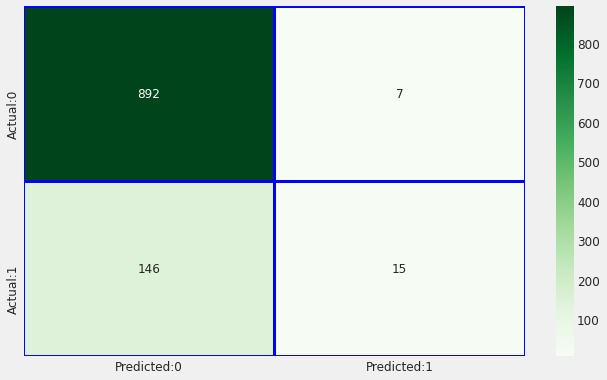

In [51]:
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

## Data Modelling - 2 (Over Sampling)

In [52]:
df = backup

In [53]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Oversampling

In [54]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [55]:
from imblearn.over_sampling import SMOTE
x_new, y_new = SMOTE(random_state= 42,sampling_strategy= 0.9).fit_resample(x, y)

In [56]:
# Much better
y_new.value_counts()

0    3595
1    3235
Name: TenYearCHD, dtype: int64

In [57]:
x = x_new
y = y_new

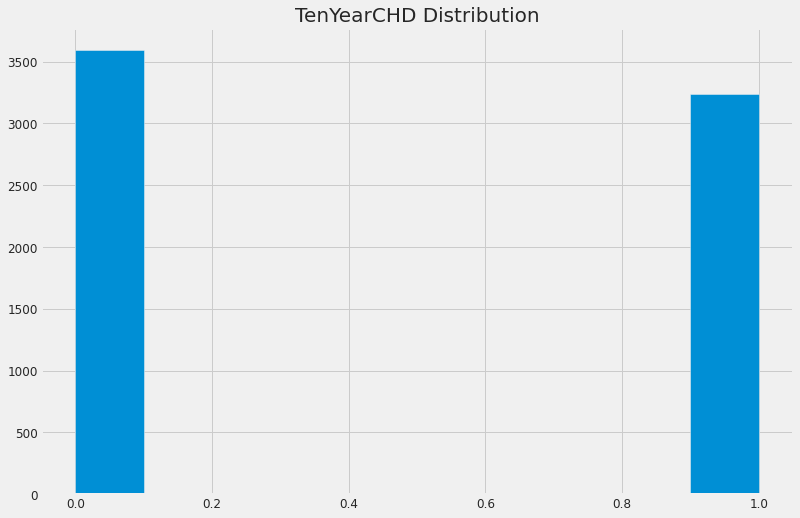

In [58]:
plt.hist(y);
plt.title("TenYearCHD Distribution");

In [59]:
# concatenating x and y together
df = pd.concat([x,y], axis = 1)

In [60]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6825,0,63,2.110074,0,0.000000,0.629975,0,0,0,230.740049,161.220147,83.299755,25.248555,69.629975,62.039804,1
6826,0,57,1.000000,1,3.201887,0.000000,0,1,0,246.293395,148.426651,82.651415,33.485037,73.651415,89.954246,1
6827,0,46,2.209985,0,0.000000,0.000000,0,0,0,191.850223,124.740089,76.049926,24.933394,60.000000,81.963655,1
6828,1,44,1.317983,1,42.046052,0.000000,0,0,0,220.451756,140.225878,90.682017,23.639847,72.953948,82.929160,1


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
num_feats = ['age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [63]:
df = df.sample(frac = 1) # Shuffling the records

In [64]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [65]:
x_train , x_test, y_train, y_test = TTS(x,y, test_size = 1/4, random_state = 42)

In [66]:
print(x_train.shape)
print(x_test.shape)

(5122, 15)
(1708, 15)


In [67]:
scaler = StandardScaler()

In [68]:
x_train[num_feats] = scaler.fit_transform(x_train[num_feats])
x_test[num_feats] = scaler.transform(x_test[num_feats])

## Logistic Regression

In [69]:
model = LogisticRegression()

In [70]:
model.fit(x_train,y_train)

LogisticRegression()

In [71]:
y_pred = model.predict(x_test)
score_train = model.score(x_train, y_train)
score_test = accuracy_score(y_test, y_pred)
print(f"Training score is: {round(score_train*100,2)}%",) 
print(f"Testing Accuracy is: {round(score_test*100,2)}%") 

Training score is: 66.91%
Testing Accuracy is: 68.62%


#### Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
cm = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[670 237]
 [299 502]]


#### Classification Report

In [73]:
print("Classification Report:\n\n",classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.69      0.74      0.71       907
           1       0.68      0.63      0.65       801

    accuracy                           0.69      1708
   macro avg       0.69      0.68      0.68      1708
weighted avg       0.69      0.69      0.69      1708



#### Plotting the confusion matrix

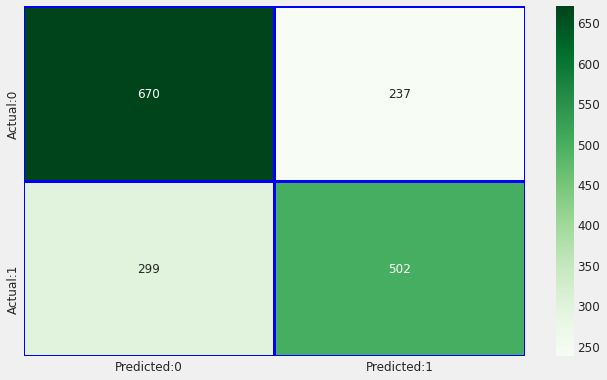

In [74]:
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

## Decision Tree

In [75]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
y_pred = model.predict(x_test)
score_train = model.score(x_train, y_train)
score_test = accuracy_score(y_test, y_pred)
print(f"Training score is: {round(score_train*100,2)}%",) 
print(f"Testing Accuracy is: {round(score_test*100,2)}%") ### Confusion Matrix

Training score is: 100.0%
Testing Accuracy is: 80.62%


#### Confusion Matrix

In [77]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
cm = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[726 181]
 [150 651]]


#### Classification Report

In [78]:
print("Classification Report:\n\n",classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.80      0.81       907
           1       0.78      0.81      0.80       801

    accuracy                           0.81      1708
   macro avg       0.81      0.81      0.81      1708
weighted avg       0.81      0.81      0.81      1708



#### Plotting the confusion matrix

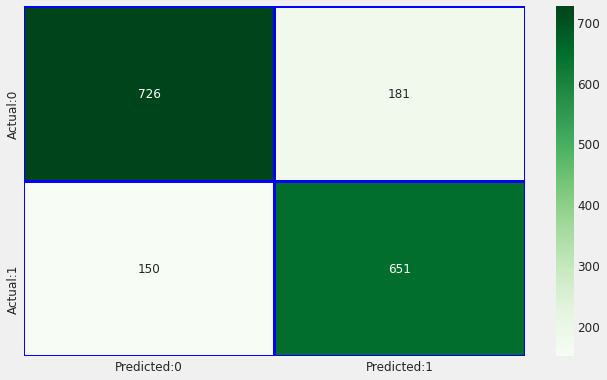

In [79]:
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

## Random Forest

In [80]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
y_pred = model.predict(x_test)
score_train = model.score(x_train, y_train)
score_test = accuracy_score(y_test, y_pred)
print(f"Training score is: {round(score_train*100,2)}%",) 
print(f"Testing Accuracy is: {round(score_test*100,2)}%") 

Training score is: 100.0%
Testing Accuracy is: 90.28%


#### Confusion Matrix

In [82]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
cm = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[861  46]
 [120 681]]


#### Classification Report

In [83]:
print("Classification Report:\n\n",classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.95      0.91       907
           1       0.94      0.85      0.89       801

    accuracy                           0.90      1708
   macro avg       0.91      0.90      0.90      1708
weighted avg       0.91      0.90      0.90      1708



#### Plotting the confusion matrix

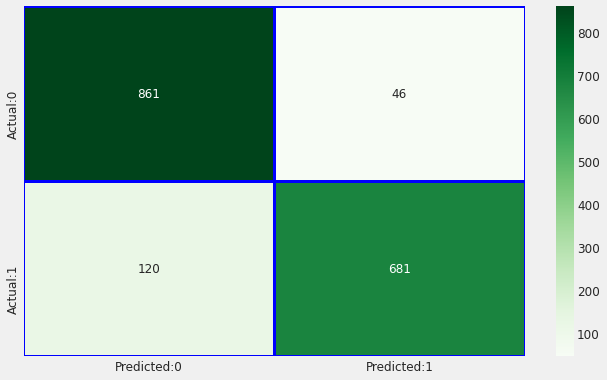

In [84]:
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5) 
plt.show() 

Conclusion: Based on testing 3 different Algorithms twice,
we concluded that Random Forest is the best one, with: <b><br> accuracy = 89%, recall = 83%, precision = 94%.

#  .. تم بحمد الله